In [1]:
import pandas as pd
import numpy as np
from umap import UMAP
from umap.parametric_umap import ParametricUMAP

from sklearn.manifold import TSNE
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [3]:
results = pd.read_csv(Path("../data/object_results.csv"))

In [4]:
results

,Object Id,XMin,XMax,YMin,YMax,171Yb_Renin Cell Intensity,175Lu_Aqu1 Cell Intensity,176Yb_H3 Cell Intensity,191Ir_DNA1 Cell Intensity,193Ir_DNA2 Cell Intensity,...,166Er_Col-IV Cell Intensity,169Tm_WT1 Cell Intensity,170Er_CD3 Cell Intensity,89Y_CD45 Cell Intensity,Cell Area (µm²),Cytoplasm Area (µm²),Membrane Area (µm²),Nucleus Area (µm²),Nucleus Perimeter (µm),Nucleus Roundness
0,0,1404,1407,853,856,16.600000,0.00000,0.0000,0.000000,0.000000,...,36747.300000,512.000000,0.000000,0.0,10,0,10,0,0,0.000000
1,1,1058,1062,913,916,0.000000,18021.87500,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,8,0,8,0,0,0.000000
2,2,1058,1065,915,925,5.627119,27317.44100,304.6271,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,59,26,33,0,0,0.000000
3,3,1159,1161,1333,1334,0.000000,0.00000,1123.3334,0.000000,0.000000,...,0.000000,2730.666700,0.000000,0.0,6,0,6,0,0,0.000000
4,4,1480,1503,790,816,1.870787,1060.32300,2361.5030,811.800540,1056.441000,...,1477.500000,1101.657300,10.233146,0.0,356,205,0,151,57,0.599115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,4371,425,451,783,810,2.902098,13988.01400,2498.9720,28.318182,46.484264,...,12.797203,334.769230,0.000000,0.0,572,511,0,61,30,0.859234
4372,4372,767,795,787,805,2.903790,261.80760,2408.4170,1602.507300,1946.548100,...,474.020420,77.620995,0.000000,0.0,343,265,0,78,36,0.811386
4373,4373,117,135,785,802,6.973282,15722.19800,2521.2786,2112.049600,2351.213600,...,10787.790000,3267.420000,264.038180,0.0,262,217,0,45,26,0.833814
4374,4374,508,532,785,813,1.400844,63.42405,948.7743,1184.464100,1449.856600,...,251.590710,259.240500,0.000000,0.0,474,373,0,101,38,0.841830


In [5]:
ignore_columns = "Object Id,XMin,XMax,YMin,YMax,Cell Area (µm²),Cytoplasm Area (µm²),Membrane Area (µm²),Nucleus Area (µm²),Nucleus Perimeter (µm),Nucleus Roundness"

In [6]:
flow_data = results.loc[:,~results.columns.isin(ignore_columns.split(","))]

In [7]:
umap_embedding = UMAP().fit_transform(flow_data)

In [8]:
umap_embedding

array([[ 3.5730727 , -2.112865  ],
       [14.085582  ,  6.625957  ],
       [14.103209  ,  6.4283295 ],
       ...,
       [ 9.780548  ,  5.1808867 ],
       [ 1.2867707 ,  3.962345  ],
       [ 0.82279813,  3.8149538 ]], dtype=float32)

In [9]:
umap_df = pd.DataFrame(umap_embedding).rename(columns={x: f"umap_{x+1}" for x in range(umap_embedding.shape[1])})

In [10]:
umap_df

,umap_1,umap_2
0,3.573073,-2.112865
1,14.085582,6.625957
2,14.103209,6.428329
3,-1.477995,9.029936
4,1.840127,3.709731
...,...,...
4371,9.973365,5.770413
4372,0.382252,4.812047
4373,9.780548,5.180887
4374,1.286771,3.962345


Text(0.5, 1.0, 'UMAP')

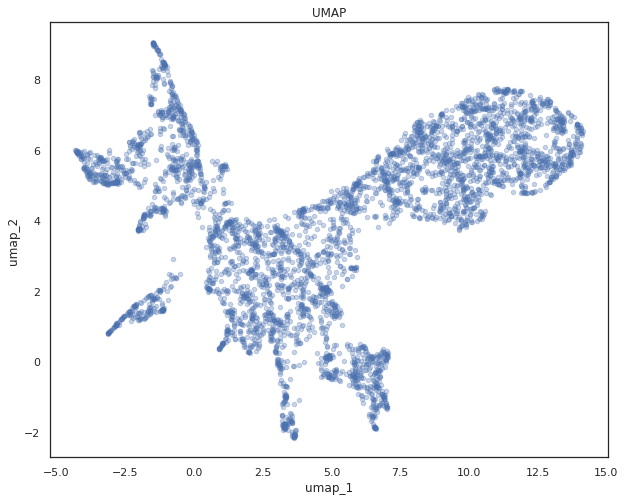

In [11]:
plt.scatter(
    x     = umap_df["umap_1"],
    y     = umap_df["umap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)
plt.xlabel("umap_1")
plt.ylabel("umap_2")
plt.title("UMAP")

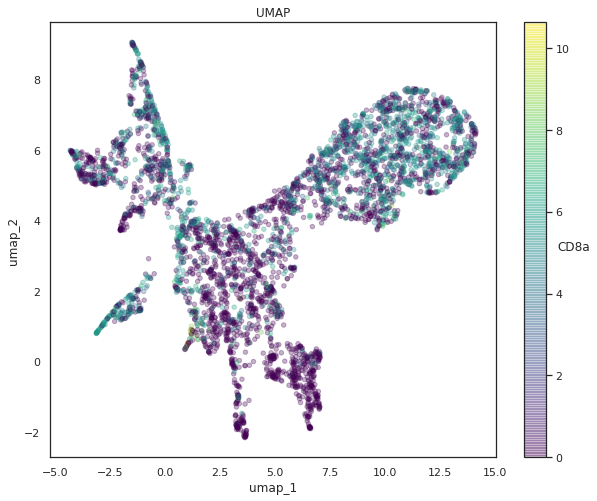

In [13]:
plt.scatter(
    x     = umap_df["umap_1"],
    y     = umap_df["umap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)

plt.xlabel("umap_1")
plt.ylabel("umap_2")
plt.title("UMAP")
plt.colorbar().set_label("CD8a", rotation = 0)

In [14]:
pumap_embedding = ParametricUMAP().fit_transform(flow_data)

/home/milo/miniconda3/envs/cytometry/lib/python3.8/site-packages/umap/parametric_umap.py:269: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  warn(


Epoch 1/10
59/59 [==============================] - 9s 161ms/step - loss: 1.3214
Epoch 2/10
59/59 [==============================] - 10s 167ms/step - loss: 1.0372
Epoch 3/10
59/59 [==============================] - 8s 142ms/step - loss: 0.9139
Epoch 4/10
59/59 [==============================] - 14s 231ms/step - loss: 0.8014
Epoch 5/10
59/59 [==============================] - 13s 223ms/step - loss: 0.6961
Epoch 6/10
59/59 [==============================] - 13s 222ms/step - loss: 0.6033
Epoch 7/10
59/59 [==============================] - 11s 181ms/step - loss: 0.5396
Epoch 8/10
59/59 [==============================] - 11s 185ms/step - loss: 0.4298
Epoch 9/10
59/59 [==============================] - 13s 223ms/step - loss: 0.4265
Epoch 10/10
59/59 [==============================] - 11s 180ms/step - loss: 0.3854


In [15]:
pumap_df = pd.DataFrame(pumap_embedding).rename(columns={x: f"pumap_{x+1}" for x in range(pumap_embedding.shape[1])})

Text(0.5, 1.0, 'ParametricUMAP')

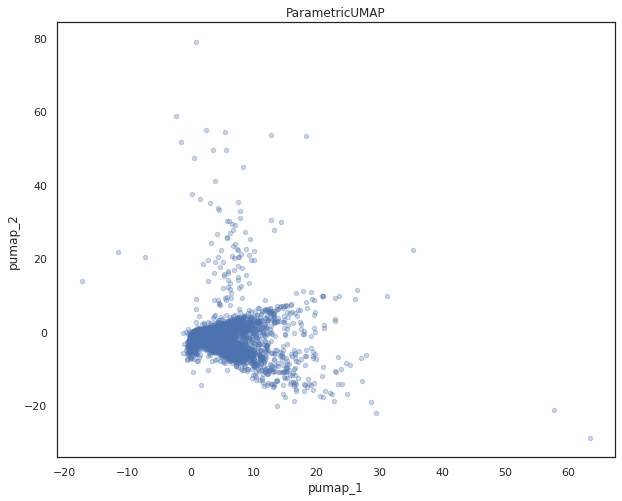

In [17]:
plt.scatter(
    x     = pumap_df["pumap_1"],
    y     = pumap_df["pumap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)
plt.xlabel("pumap_1")
plt.ylabel("pumap_2")
plt.title("ParametricUMAP")

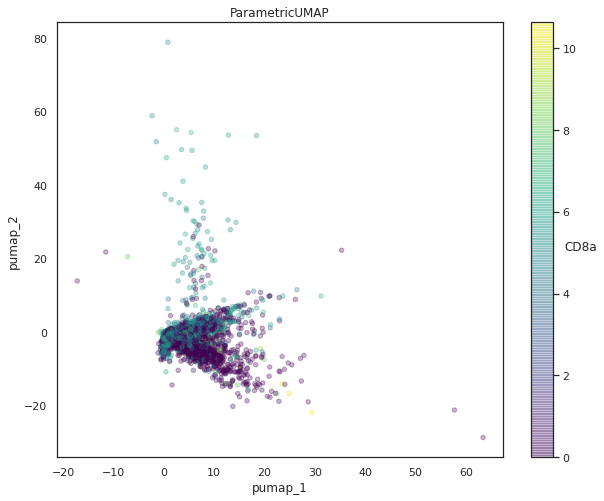

In [18]:
plt.scatter(
    x     = pumap_df["pumap_1"],
    y     = pumap_df["pumap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)

plt.xlabel("pumap_1")
plt.ylabel("pumap_2")
plt.title("ParametricUMAP")
plt.colorbar().set_label("CD8a", rotation = 0)

Well, that is just plain weird.  Probably needs some tweaking.

In [20]:
results_with_umap = pd.concat([umap_df.reset_index(drop=True), results], axis=1)

In [21]:
tsne_embeddings = TSNE().fit_transform(flow_data)

In [22]:
tsne_embeddings

array([[  7.6742105,  57.23925  ],
       [-92.17671  ,   6.2394147],
       [-90.84633  ,   4.568515 ],
       ...,
       [-36.19491  ,   5.261705 ],
       [ 45.437534 ,  13.883379 ],
       [ 44.24839  ,   9.154161 ]], dtype=float32)

In [23]:
tsne_df = pd.DataFrame(tsne_embeddings).rename(columns={x: f"tsne_{x+1}" for x in range(tsne_embeddings.shape[1])})

Text(0.5, 1.0, 'sckit-learn TSNE')

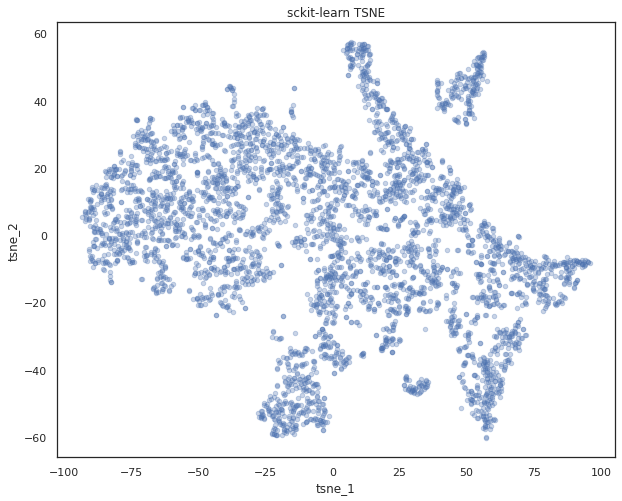

In [24]:
plt.scatter(
    x     = tsne_df["tsne_1"],
    y     = tsne_df["tsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.title("sckit-learn TSNE")

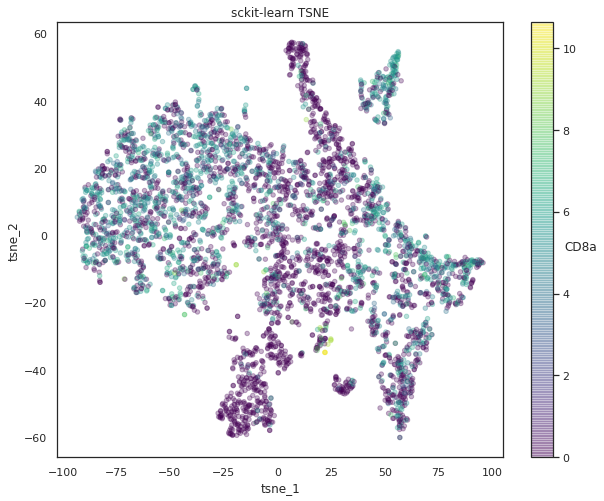

In [25]:
plt.scatter(
    x     = tsne_df["tsne_1"],
    y     = tsne_df["tsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.title("sckit-learn TSNE")
plt.colorbar().set_label("CD8a", rotation = 0)

In [26]:
from pacmap import PaCMAP

In [28]:
pacmap_embeddings = PaCMAP(n_dims=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
pac_transformed = pacmap_embeddings.fit_transform(flow_data.values)
pacmap_df = pd.DataFrame(pac_transformed).rename(columns={x: f"pac_{x+1}" for x in range(pac_transformed.shape[1])})

Text(0.5, 1.0, 'PaCMAP')

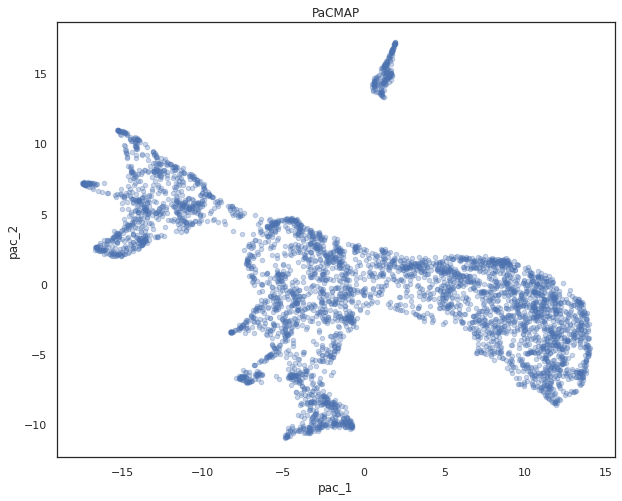

In [29]:
plt.scatter(
    x     = pacmap_df["pac_1"],
    y     = pacmap_df["pac_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)
plt.xlabel("pac_1")
plt.ylabel("pac_2")
plt.title("PaCMAP")

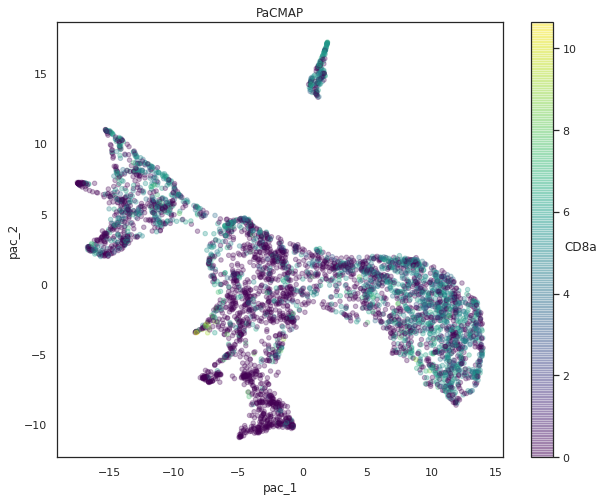

In [30]:
plt.scatter(
    x     = pacmap_df["pac_1"],
    y     = pacmap_df["pac_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)

plt.xlabel("pac_1")
plt.ylabel("pac_2")
plt.title("PaCMAP")
plt.colorbar().set_label("CD8a", rotation = 0)

In [31]:
import MulticoreTSNE

In [32]:
opttsne_embeddings = MulticoreTSNE.MulticoreTSNE().fit_transform(flow_data)

In [33]:
opttsne_embeddings

array([[  1.80442788, -36.15945076],
       [ 48.84508756,  11.76638209],
       [ 48.58203722,  10.71528197],
       ...,
       [ 16.83675774,   7.79807567],
       [-18.77821951,   2.43497942],
       [-20.64933439,  -0.46047215]])

In [34]:
opttsne_df = pd.DataFrame(opttsne_embeddings).rename(columns={x: f"opttsne_{x+1}" for x in range(opttsne_embeddings.shape[1])})

Text(0.5, 1.0, 'opt-TSNE')

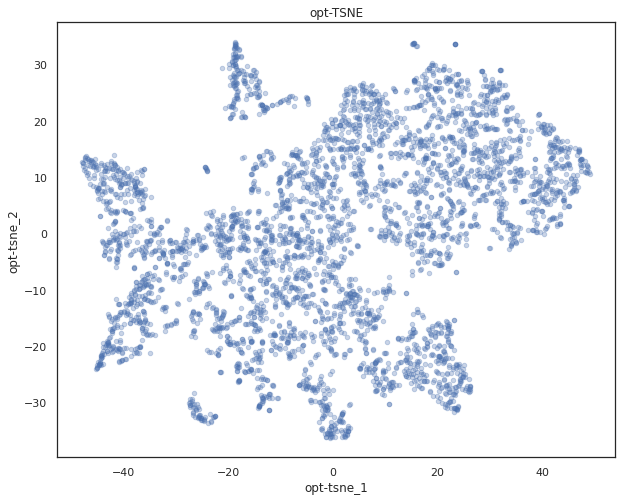

In [35]:
plt.scatter(
    x     = opttsne_df["opttsne_1"],
    y     = opttsne_df["opttsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)

plt.xlabel("opt-tsne_1")
plt.ylabel("opt-tsne_2")
plt.title("opt-TSNE")

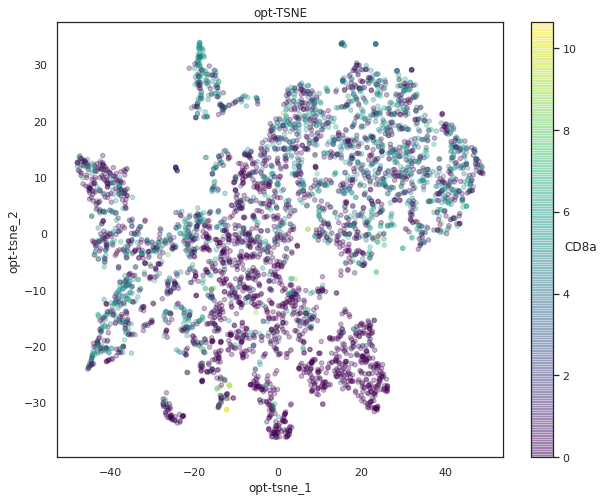

In [36]:
plt.scatter(
    x     = opttsne_df["opttsne_1"],
    y     = opttsne_df["opttsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)

plt.xlabel("opt-tsne_1")
plt.ylabel("opt-tsne_2")
plt.title("opt-TSNE")
plt.colorbar().set_label("CD8a", rotation = 0)

In [37]:
import openTSNE

In [38]:
opentsne_embeddings = openTSNE.TSNE().fit(flow_data.values)

In [39]:
opentsne_embeddings

TSNEEmbedding([[-21.13602624,  35.19671018],
               [ 61.06026907,   9.38992197],
               [ 60.38607202,  10.45802392],
               ...,
               [ 21.56342958,   1.82243756],
               [-17.17688402, -10.02381509],
               [-21.35367538, -10.19605578]])

In [40]:
opentsne_df = pd.DataFrame(opentsne_embeddings).rename(columns={x: f"opentsne_{x+1}" for x in range(opentsne_embeddings.shape[1])})

Text(0.5, 1.0, 'open-TSNE')

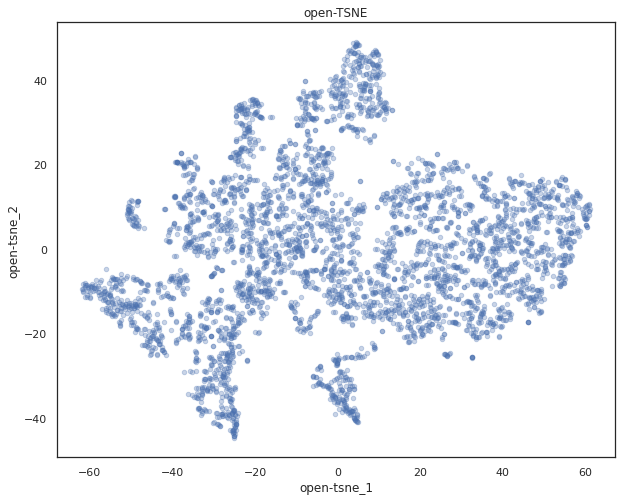

In [41]:
plt.scatter(
    x     = opentsne_df["opentsne_1"],
    y     = opentsne_df["opentsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1'
)
plt.xlabel("open-tsne_1")
plt.ylabel("open-tsne_2")
plt.title("open-TSNE")

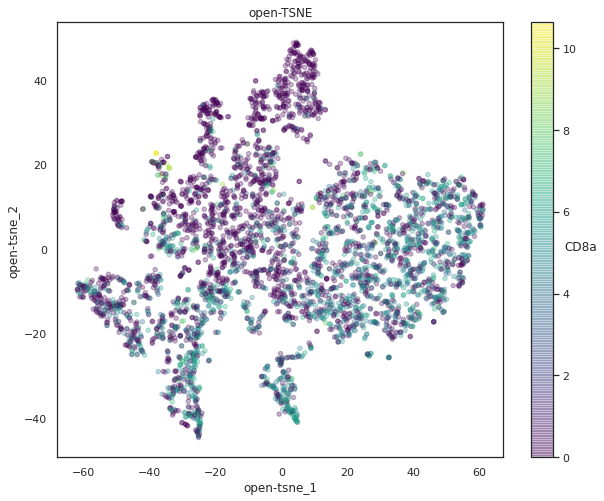

In [42]:
plt.scatter(
    x     = opentsne_df["opentsne_1"],
    y     = opentsne_df["opentsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1),
)
plt.xlabel("open-tsne_1")
plt.ylabel("open-tsne_2")
plt.title("open-TSNE")
plt.colorbar().set_label("CD8a", rotation = 0)

Pull in the cluster labels from `clustering.ipynb`

In [43]:
cluster_labels = np.load(file="../data/cluster_groups.npy", allow_pickle=True)

In [47]:
sns.set(style='white', rc={'figure.figsize':(15,12)})

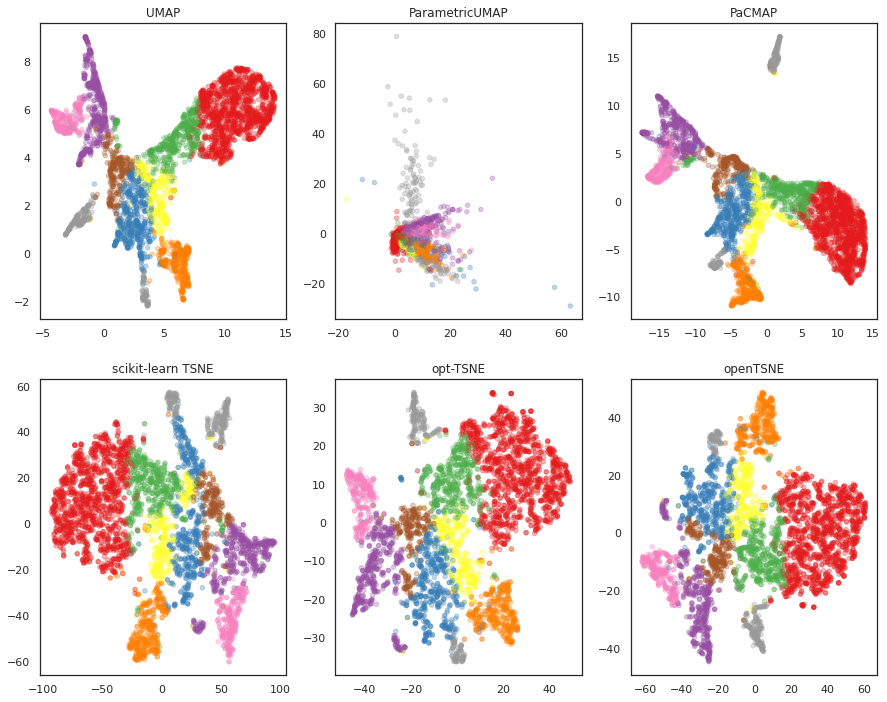

In [48]:
fig, axs = plt.subplots(2,3)

axs[0,0].scatter(
    x     = umap_df["umap_1"],
    y     = umap_df["umap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# axs[0,0].xlabel("umap_1")
# axs[0,0].ylabel("umap_2")
axs[0,0].set_title("UMAP")

axs[0,1].scatter(
    x     = pumap_df["pumap_1"],
    y     = pumap_df["pumap_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# axs[0,0].xlabel("umap_1")
# axs[0,0].ylabel("umap_2")
axs[0,1].set_title("ParametricUMAP")


axs[0,2].scatter(
    x     = pacmap_df["pac_1"],
    y     = pacmap_df["pac_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# plt.xlabel("pac_1")
# plt.ylabel("pac_2")
axs[0,2].set_title("PaCMAP")

axs[1,0].scatter(
    x     = tsne_df["tsne_1"],
    y     = tsne_df["tsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# axs[0,1].xlabel("tsne_1")
# axs[0,1].ylabel("tsne_2")
axs[1,0].set_title("scikit-learn TSNE")
fig.show()

axs[1,1].scatter(
    x     = opttsne_df["opttsne_1"],
    y     = opttsne_df["opttsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# axs[0,1].xlabel("tsne_1")
# axs[0,1].ylabel("tsne_2")
axs[1,1].set_title("opt-TSNE")
fig.show()

axs[1,2].scatter(
    x     = opentsne_df["opentsne_1"],
    y     = opentsne_df["opentsne_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'Set1',
    c     = cluster_labels,
)
# axs[0,1].xlabel("tsne_1")
# axs[0,1].ylabel("tsne_2")
axs[1,2].set_title("openTSNE")
fig.show()